#Bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Métodos

In [2]:
def lagrange(pontos,x,y,valor):
  sum = 0

  for i in range (pontos):
    produto = y[i]
    for j in range(pontos):
      if i!=j:
        produto = produto *((valor - x[j])/(x[i] - x[j]))

    sum += produto
    
  return sum

In [3]:
def newton(pontos,x,y,interpolar):
  tabelaD = np.empty((pontos,pontos)) # cria a matriz pra resolver a tabela

  for i in range(pontos): #ordem 0
    tabelaD[i][0] = y[i] #preenche a tabela nas colunas

  for j in range(1,pontos):
    for i in range(pontos-j):
      tabelaD[i][j] = (tabelaD[i+1][j-1] - tabelaD[i][j-1])/(x[i+j]-x[i]) #constrói a tabela de diferenças divididas
  
  #print(pd.DataFrame(tabelaD))
  
  termosX = 1 #guarda os valores dos termos (x-x0),(x-x1),(x-x2)....(x-xn)
  acumuladorf  = tabelaD[0][0] # guarda os valores de f[x0],f[x1],f[x0,x1]...
  for i in range(1,pontos):#começa em 1 porque a ordem 0 é f(x)
    termosX = termosX*(interpolar - x[i-1])
    acumuladorf  = acumuladorf + tabelaD[0][i]*termosX
    
  return acumuladorf

In [4]:
def apresentacaoEx2(x,y,interpolar): #o tamanho padrão é 6, já deixei especificado dentro da função
  print("Resuloção pelo método de Lagrange para x = "+str(interpolar) +": "+ str(lagrange(6,x,y,interpolar)))
  print("Resuloção pelo método de Newton pra x = "+str(interpolar) +": "+ str(newton(6,x,y,interpolar)))
  print("\n")

In [5]:
def mmq(x,y,tamanho):
  sxy = sx = sy = sx2 = 0 #somatorios de xy,s,y,e x^2

  for i in range(tamanho):
    sxy+= x[i]*y[i]
    sx+=x[i]
    sy+=y[i]
    sx2+=x[i]**2
  
  a = round(((tamanho * sxy) - (sx*sy)) / ((tamanho*sx2) - sx**2),7)
  b = round(((sx * sxy) - (sy*sx2))/ ((sx**2) - tamanho *sx2),7)

  return a,b

In [6]:
def resolveretammq(a, b, x):
  return a*x + b 

# Lista de Exercício 4




##Questão 1 – A tabela seguinte apresenta a velocidade de queda de um paraquedista em função do tempo. 

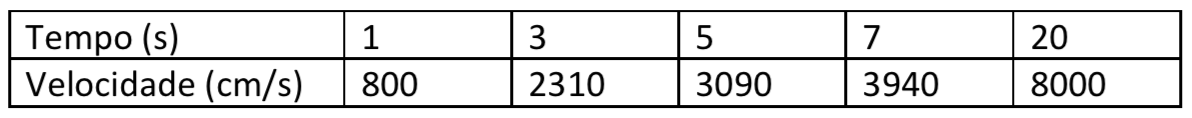

##Estime o valor da velocidade no instante de tempo 10 segundos, utilizando um polinômio interpolador de grau 3.

In [7]:
x = [1,3,5,7,20]
y = [800,2310,3090,3940,8000]
interpolar = 10

print("Resuloção pelo método de Lagrange: "+ str(lagrange(5,x,y,interpolar)))
print("Resuloção pelo método de Newton: "+ str(newton(5,x,y,interpolar)))

Resuloção pelo método de Lagrange: 6219.72255298881
Resuloção pelo método de Newton: 6219.722552988807


Justificativa questão 1:
O valor obtido em ambos os métodos pode ser truncado para 6219. Observando a tabela, o valor do x que procuramos interpolar (x=10) se encontra entre os valores de x=7 e x=20. O resultado de f(10) = 6219, se encontra entre os valores de f(7) e f(20), de modo que o resultado obtido pelos métodos de interpolação para f(10) está coerente com a tabela, de modo que a tabela poderia ser reescrita com a inserção dos valores x = 10 e f(10) = 6219.

##Questão 2 – A tabela seguinte apresenta a produção de milho em 6 propriedades agrícolas. A variável x é a área medida em hectare e f(x) é a produção medida em sacas. 
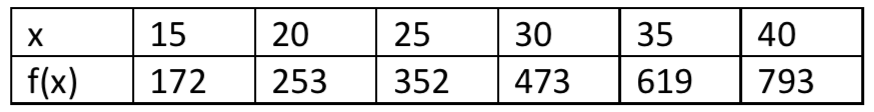
##Estime o valor da produção em 12, 22 e 31 hectares, utilizando um polinômio interpolador de grau 4.

In [8]:
x = [15,20,25,30,35,40]
y = [172,253,352,473,619,793]
interpolar = 12

apresentacaoEx2(x,y,12)
apresentacaoEx2(x,y,22)
apresentacaoEx2(x,y,31)



Resuloção pelo método de Lagrange para x = 12: 129.65715199999954
Resuloção pelo método de Newton pra x = 12: 129.65715200000005


Resuloção pelo método de Lagrange para x = 22: 290.181952
Resuloção pelo método de Newton pra x = 22: 290.181952


Resuloção pelo método de Lagrange para x = 31: 500.1103360000001
Resuloção pelo método de Newton pra x = 31: 500.110336




Justificativa questão 2:
O valor obtido em ambos os métodos para x = 12 pode ser truncado para 129. Observando a tabela, o valor do x que procuramos interpolar (x=12) se encontra antes do primeiro valor da tabela que é x = 15. O resultado de f(12) = 129, se encontra abaixo do valor de f(15) = 172 , de modo que o resultado obtido pelos métodos de interpolação para f(12) está coerente com a tabela.

O valor obtido em ambos os métodos para x = 22 pode ser truncado para 290. Observando a tabela, o valor do x que procuramos interpolar (x=22) se encontra entre os valores de x=20 e x=25. O resultado de f(22) = 290, se encontra entre os valores de f(20) e f(25), de modo que o resultado obtido pelos métodos de interpolação para f(22) está coerente com a tabela.

O valor obtido em ambos os métodos para x = 31 pode ser truncado para 500. Observando a tabela, o valor do x que procuramos interpolar (x=31) se encontra entre os valores de x=30 e x=35. O resultado de f(31) = 500, se encontra entre os valores de f(30) e f(35), de modo que o resultado obtido pelos métodos de interpolação para f(35) está coerente com a tabela.

##Questão 3 – A resistência de um certo fio de metal, f(x), varia com o diâmetro desse fio, x. Foram medidas as resistência de 5 fios de diversos diâmetros. 
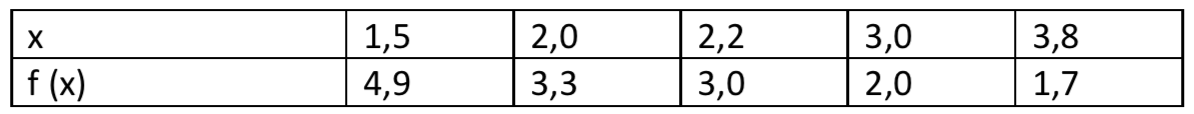
##Estime o valor da resistência de um fio de 1,75 de diâmetro, utilizando spline cúbica natural.

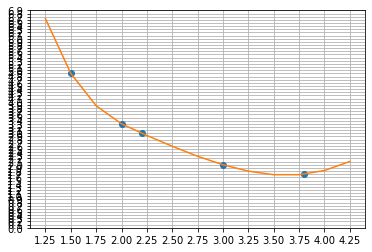

[1.75071009 4.93824445]


In [9]:
x = [1.5,2.0,2.2,3.0,3.8] #vetor dos valores de x

y = [4.9,3.3,3.0,2.0,1.7] # vetor dos valores de y

cs = CubicSpline(x, y) # cria um objeto CubicSpline com os vetores x e y

xs = np.arange(1.25,4.5,0.25) # cria um vetor de valores que será o eixo x da figura

grafico = plt.subplot()

grafico.plot(x, y, 'o') # plota os pontos x e y do exercício
grafico.plot(xs, cs(xs)) # a partir da função spline cúbica definida com os pontos do exercício, e dos pontos marcados no eixo x, se obtem a curva interpolante

plt.rcParams['figure.figsize'] = (15,15)#tamanho da figura
plt.xticks(xs) # Ajuste do eixo x para facilitar a visualização
plt.yticks(np.arange(0,7,0.1)) #alterações no eixo y para facilitar a visualização
plt.grid()#mostra o grid
plt.show()
plt.close()

#Agora vizualizar o gráfico, e ver onde a coordenada x = 1.75 corta a curva interpolante. Pela vizualização do gráfico se observa que o valor
#seria algo entorno de 3.87 (um pouco mais da metade do intervalo entre 3.8 e 3.9).

#com o valor aproximado de f(x), se utiliza a função solve do obtejo CubicSpline (recebe como parâmetro f(x) e retorna dois valores possíveis de x), para conferir o resultado
print(cs.solve(3.87)) #resultado 1.75071009, está de acordo com o exercício, entãão 3.87 é uma resposta aproximada.


Resposta: Valor da resistência de um fio de 1.75 de diâmetro é 3.87

Justificativa da questão 3:
Para a resolução da questão foi utilizado o elemento CubicSpline da biblioteca de interpolaçãão scipy. Primeiro criou-se este objeto com base nos valores de x e y fornecidos pelo exercício, depois criou-se uma lista com valores que representariam o eixo x no gráfico, e se plotou o gráfico dos pontos, e da spline interpoladora, ajustando os valores apresentados nos eixos x e y para melhor visualizar o gráfico.

A partir da visualização do gráfico gerado, é possível ver onde a coordenada x=1.75 (pedida no exercício) intersecciona a curva interpoladora, e apartir deste ponto de intersecção, fazendo a sua projeção no eixo y, é possível ver que o valor de f(x) para x = 1.75 se encontra no intervalo entre 3.8 e 3.9, mais especificamente na metade superior do intervalo, podendo ser aproximado visualmente para 3.86, 3.87 ou 3.88. Utilizando 3.87 como aproximação para f(x), este valor é passado como parâmetro para o método solve do objeto CubicSpline, que dado um valor de f(x) retorna um valor de x. 

O resultado deste método quando passado o parâmetro 3.87 é (1.75071009, 4.93824445), sendo estes duas soluções possíveis para aquele valor de f(x). Porém, para este exercício só importa a primeira solução, 1.75071009, que pode ser aproximada para 1.75, valor pedido no exercício.

Observando a tabela, podemos observar os valores de x em ordem crescente e os valores de f(x) em ordem decrescente. Sendo assim, o valor x que procuramos interpolar (x=1.75) se encontra entre os valores de x=1.5 e x=2. O resultado de f(1.75) = 3.87, se encontra entre os valores de f(1.5) = 4.9 e f(2.0) = 3.3, lembrando que estes valores se encontram em ordem decrescente, de modo que o resultado obtido pelo métodos da spline cúbica para f(1.75) está coerente com a tabela.

##Questão 4 – Seja dado o conjunto de pontos: 

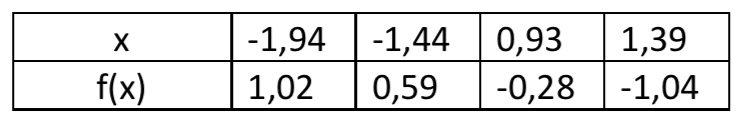

##Encontre a função f(x) = a + b x que melhor se ajusta no sentido de mínimos quadrados aos pontos dados. Então, responda cada item:

1.   Faça um gráfico com os pontos e o esboço da função ajustada.
2.   Encontre o valor de f(1,00).
3.   Encontre o valor de f(0,93).

##Forneça os valores calculados com 7 dígitos significativo por arredondamento.

A função que melhor se ajusta aos pontos é: -0.5336274x + (-0.0689113)


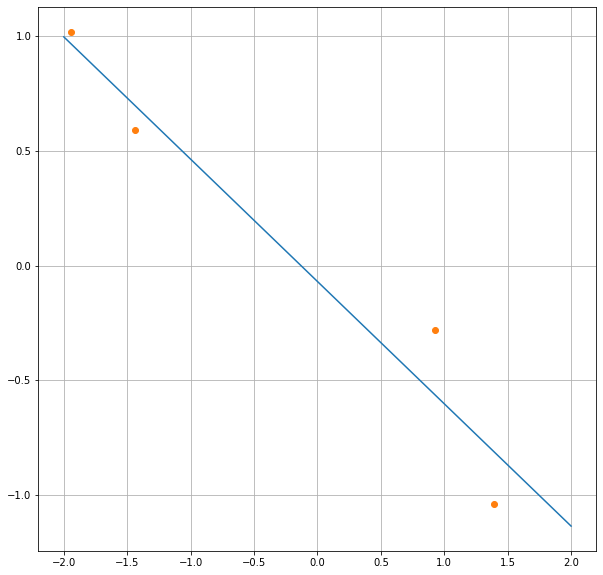

B) O valor de f(1) é -0.6025387.
C) O valor de f(0.93) é -0.565184782.


In [12]:
#a
x = [-1.94,-1.44,0.93,1.39]
y = [1.02,0.59,-0.28,-1.04]
a,b = mmq(x,y,4)
print("A função que melhor se ajusta aos pontos é: "+str(a)+"x + ("+str(b)+")")

curva = np.linspace(-2,2,100)#cria uma curva
coordenadas = [resolveretammq(a,b,valor) for valor in curva]# e as coordenadas da curva a partir dos valores de a e b resolvidos pela função mmq

plt.plot(curva,coordenadas)#plota a linha
plt.plot(x,y,'o')#plota os pontos x e y do exercício
plt.grid()
plt.rcParams['figure.figsize'] = (10,10)
plt.show()
plt.close()

#b
interpola = 1
print("B) O valor de f("+str(interpola)+") é "+str(resolveretammq(a,b,interpola))+".")
#c
interpola = 0.93
print("C) O valor de f("+str(interpola)+") é "+str(resolveretammq(a,b,interpola))+".")